<h1 style='text-align: center'>Exercices en R -Aanalyse des données de biopuces de Den Boer et al. (2009)</h1>
<br>
<hr style="height: 1.5px; width:90%"></hr>
<h2>Introduction <em>le jeu de Den Boer 2009</em></h2>
<p style="text-align: justify">Comme cas d’étude, nous analyserons un jeu de données de Den Boer et collègues [@DenBoer:2009ik].
Les auteurs ont caractérisé le transcriptome de 190 patients souffrants de leucémie lymphoblastique aigue (Acute Lymphoblastic Leukaemia, ALL).
Cette leucémie est caractérisée par une prolifération clonale anormale, dans la moëlle osseuse, de progéniteurs de lymphocytes qui restent bloqués dans une phase précise de leur différenciation. La prolifération peut résulter de différentes mutations, dont certaines sont récurrentes chez différents patients. Le jeu de données de Den Boer inclut l’information concernant les problèmes génétiques particuliers associés à chaque échantillon d’un patient atteint de leucémie.
Dans leur article original, Den Boer et collègues ont défini une signature transcriptomique, c’est-à-dire une sélection de gènes dont les profils de transcription sont spécifiquement affectés dans une ou plusieurs sous-classes des leucémies. Les profils d’expression de ces gènes-signature peuvent ensuite être utilisés pour classer de nouveaux échantillons de patients atteints de leucémie, et prédire le type de perturbation génétique associée à leur cas.
Un avantage de ce jeu de données est qu’il inclut des groupes d’effectifs relativement élevés (4 groupes avec >30 patients), par rapport à d’autres publications dans le domaine de l’analyse transcriptomique.
Le tableau de donnée sur lequel nous travaillerons comporte 190 colonnes (une par patient) et ~22.000 lignes (une par gène) et les valeurs indiquent le niveau d’expression du gène chez le patient considéré.
On dispose également d’une table “pheno” qui fournit des informations sur chaque échantillon, et en particulier la classe de leucémie dont souffre ce patient (en fait cette classe est déterminée par son génotype plutôt que son phénotype, mais pour des raisons historiques les tableaux annotations des échantillons sont communément dénommés “pheno” dans le domaine des biopuces).
</p>
<h2>Le But du TP</h2>

Le but de ce TP sera de mettre en place une procédure qui combinera les tâches suivants:
<ol>
    <li>Télécharger les fichiers de données à partir d’un site Web.
    <li>Mesurer une série de paramètres statistiques sur les gènes (lignes) et échantillons (colonnes).
    <li>Détecter les gènes différentiellement exprimés entre deux groupes d’échantillons (correspondant à deux classes de leucémie).</li>
</ol>
Nous essaierons pour chaque étape - de modulariser le code en écrivant des fonctions ré-utilisables - d’utiliser des techniques efficaces en évitant les boucles, et en utilisant plutôt la fonction <B><em>apply()</em></B>.
<h2>Exercices</h2>
<h3>Phase 1 : récupération des données</h3>
<h3>Création d'un dossier local pour les données et résultats</h3>

In [9]:
# Indécation de la racine
dir.home <- Sys.getenv("HOME")

# Construction du chemin en concaténant des chaînes de caractères
dir.output <- file.path(dir.home, "STAT", "TP", "DenBoer2009")

# Création du dossier 
dir.create(dir.output, recursive=TRUE, showWarnings=FALSE)

setwd(dir.output)

# écrire le chemin de sortie "output directory"
print(paste("Output directory for this practical: ", dir.output))

list.files(dir.output)

[1] "Output directory for this practical:  C:\\Users\\Louai KB\\Documents/STAT/TP/DenBoer2009"


[1] "data"

<h3>Téléchargement des données</h3>

In [10]:
# définition de l'URL
url.course <- "http://pedagogix-tagc.univ-mrs.fr/courses/ASG1"

microarray.data.url <- file.path(url.course, "data", "marrays")

print(paste("Course URL: ", url.course))

print(paste("URL for the microarray data folder: ", microarray.data.url))

[1] "Course URL:  http://pedagogix-tagc.univ-mrs.fr/courses/ASG1"
[1] "URL for the microarray data folder:  http://pedagogix-tagc.univ-mrs.fr/courses/ASG1/data/marrays"


In [11]:
expr.url <- file.path(microarray.data.url, "GSE13425_Norm_Whole.txt")

# création du sous dossier data
dir.dataa <- file.path(dir.output, "data")
dir.create(dir.dataa, recursive=TRUE, showWarnings = FALSE)

expr.file <- file.path(dir.dataa, "DenBoer_2009_GSE13425_Norm_Whole.txt")

if (file.exists(expr.file)) {
    
    message("Expression file already downloaded: ", expr.file)
    
} else {
    
    message("Downloading matrix table from ", expr.url)
    download.file(url = expr.url, destfile = expr.file)
    message("Local expression file: ", expr.file)
}

message("Loading expression table from ", expr.file)

expr.matrix <- read.table(expr.file,sep="\t", header = TRUE, row.names = 1)
df.expr.matrix <- data.frame(expr.matrix)

Local expression file: C:\Users\Louai KB\Documents/STAT/TP/DenBoer2009/data/DenBoer_2009_GSE13425_Norm_Whole.txt
Loading expression table from C:\Users\Louai KB\Documents/STAT/TP/DenBoer2009/data/DenBoer_2009_GSE13425_Norm_Whole.txt


In [12]:
df.expr.matrix

,GSM338666,GSM338667,GSM338668,GSM338669,GSM338670,GSM338671,GSM338672,GSM338673,GSM338674,GSM338675,...,GSM338846,GSM338847,GSM338848,GSM338849,GSM338850,GSM338851,GSM338852,GSM338853,GSM338854,GSM338855
DDR1|1007_s_at,4.38,4.38,4.23,3.98,5.12,3.90,4.18,4.23,4.20,4.21,...,4.47,4.88,5.73,5.55,4.15,6.16,4.23,5.18,4.68,4.55
RFC2|1053_at,3.44,3.33,3.73,3.58,3.40,3.07,3.02,3.37,2.97,3.22,...,2.90,3.40,3.04,2.88,2.88,2.89,3.34,3.02,3.07,2.99
HSPA6|117_at,2.51,2.62,2.37,2.43,2.49,2.57,2.69,2.74,2.40,2.59,...,2.61,2.31,2.48,2.68,4.09,2.65,2.83,2.66,2.54,2.64
PAX8|121_at,6.24,6.21,6.10,6.09,6.53,6.18,6.58,6.12,6.02,6.14,...,6.21,6.01,6.20,6.34,6.39,6.25,6.05,6.30,6.38,6.25
GUCA1A|1255_g_at,2.29,2.23,2.17,2.26,2.27,2.18,2.15,2.11,2.21,2.40,...,2.36,2.06,2.14,2.24,2.27,2.27,2.25,2.14,2.23,2.16
UBA7|1294_at,5.57,5.83,5.46,5.20,6.83,5.22,6.12,5.06,5.33,5.65,...,5.48,6.29,5.69,5.67,5.34,5.34,5.98,6.73,5.72,5.57
THRA|1316_at,3.09,3.34,3.10,3.20,3.16,3.23,3.32,3.05,3.17,3.02,...,3.28,2.94,3.16,3.19,3.21,3.29,3.15,3.46,3.32,3.09
PTPN21|1320_at,2.35,2.46,2.30,2.34,2.21,2.29,2.30,2.24,2.42,2.28,...,2.31,2.33,2.32,2.13,2.26,2.21,2.31,2.42,2.51,2.46
CCL5|1405_i_at,2.45,2.52,2.48,2.44,2.22,2.29,2.28,2.33,3.41,2.16,...,2.43,2.87,2.33,2.28,2.27,2.70,2.22,2.27,2.41,2.40
CYP2E1|1431_at,2.33,2.42,2.18,2.15,2.27,2.35,2.40,1.95,2.21,2.01,...,2.26,1.96,2.11,2.31,2.30,2.41,2.13,2.26,2.27,2.21


### Exercices
1. Adaptez le code ci-dessus pour télécharger une copie locale du fichier pheno.



In [13]:
# téléchargement d'une copie locale du fichier pheno 
expr.pheno.url <- file.path(microarray.data.url, "phenoData_GSE13425.tab")
expr.pheno.file <- file.path(dir.dataa, "DenBoer_2009_phenoData_GSE13425.txt")

if (file.exists(expr.pheno.file)) {
    
    message("Expression file already downloaded: ", expr.pheno.file)
    
} else {
    
    message("Downloading matrix table from ", expr.pheno.url)
    download.file(url = expr.pheno.url, destfile = expr.pheno.file)
    message("Local expression file: ", expr.pheno.file)
}

message("Loading expression table from ", expr.pheno.file)

Local expression file: C:\Users\Louai KB\Documents/STAT/TP/DenBoer2009/data/DenBoer_2009_phenoData_GSE13425.txt
Loading expression table from C:\Users\Louai KB\Documents/STAT/TP/DenBoer2009/data/DenBoer_2009_phenoData_GSE13425.txt


In [15]:
pheno.table <- read.table(expr.pheno.file, sep = "\t", header = TRUE, row.names = 1)
pheno.table

,Sample.title,Sample.source.name.ch1,Sample.characteristics.ch1,Sample.description,sample.labels,sample.colors
GSM338666,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338667,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338668,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338669,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338670,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338671,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338672,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338673,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338674,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen
GSM338675,T-ALL,bone marrow or peripheral blood sample from child with acute lymphoblastic leukemia,T-ALL,Sample collected at diagnosis.,T,darkgreen


2. Chargez les fichiers d’expression et de description des échantillons dans des objets de type data.frame(), et récupérez dans un vecteur les sous-types de cancer associés à chaque échantillon.

In [16]:
sample.labels <- as.vector(pheno.table$sample.labels)
sample.labels

[1] "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"  
 [13] "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"  
 [25] "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"   "T"  
 [37] "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt" 
 [49] "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt" 
 [61] "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt" 
 [73] "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bt"  "Bth" "Bh"  "Bh"  "Bh"  "Bh" 
 [85] "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh" 
 [97] "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh" 
[109] "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh"  "Bh" 
[121] "Bh"  "Bh"  "Bh"  "Bh"  "BE"  "BEp" "BEp" "BEp" "BEp" "BEp" "BEp" "BEp"
[133] "BEp" "BEs" "BEs" "BEs" "BEs" "Bc"  "Bc"  "Bc"  "Bc"  "Bch" "BM"  "BM" 
[145] "BM"  "BM"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo" 
[157] "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo" 
[169] "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo" 
[181] "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"  "Bo"

3. Comptez le nombre d’échantillons par sous-classe de cancer.

In [17]:
numberOfSamples <- sort(table(sample.labels), decreasing = TRUE)
numberOfSamples

sample.labels
 Bh  Bo  Bt   T BEp  Bc BEs  BM Bch  BE Bth 
 44  44  43  36   8   4   4   4   1   1   1 

### Phase2 
4.	Sélectionnez deux groupes comportant au moins 30 échantillons chacun, et créez une table d’expression et une table pheno limitées à ces deux groupes. A partir de ce moment vous travaillerez systématiquement avec ces deux tables.

In [18]:
group.one <- names(numberOfSamples[1])
group.two <- names(numberOfSamples[2])

group.one.expr <- expr.matrix[, sample.labels == group.one]
group.two.expr <- expr.matrix[, sample.labels == group.two]

dim(group.one.expr)
dim(group.two.expr)

[1] 22283    44

[1] 22283    44

5. En utilisant la fonction <B><em>apply()</em></B>, calculez pour chaque gène les paramètres suivants, et stockez-les dans une data.frame().
<ul>
    <li><B>m1,m2</B> moyennes d’échantillons des deux groupes</li>
    <li><B>s1.est,s2.est</B> estimations des écarts-types des populations dont sont extraits les échantillons du 1er et 2d groupe, respectivement</li>
    <li><B>d</B> différence entre les moyennes des deux groupes.</li>

In [19]:
genes.parameters <- data.frame(
    m1=apply(group.one.expr, 1, mean), 
    s1.est=apply(group.one.expr, 1, sd),
    m2=apply(group.two.expr, 1, mean), 
    s2.est=apply(group.two.expr, 1, sd)
)

genes.parameters['d'] <- genes.parameters$m2 - genes.parameters$m1

genes.parameters

,m1,s1.est,m2,s2.est,d
DDR1|1007_s_at,4.679091,0.28974582,4.697045,0.50544284,0.017954545
RFC2|1053_at,3.132955,0.20012298,3.142727,0.22157327,0.009772727
HSPA6|117_at,2.563864,0.18018357,2.662955,0.31694457,0.099090909
PAX8|121_at,6.160682,0.15170960,6.179318,0.17371987,0.018636364
GUCA1A|1255_g_at,2.165000,0.08420628,2.188636,0.09961766,0.023636364
UBA7|1294_at,5.365682,0.30743044,5.854545,0.43878508,0.488863636
THRA|1316_at,3.199091,0.12302048,3.190909,0.12545393,-0.008181818
PTPN21|1320_at,2.313636,0.11705874,2.305682,0.11801454,-0.007954545
CCL5|1405_i_at,2.374773,0.32617222,2.446591,0.40853079,0.071818182
CYP2E1|1431_at,2.162045,0.10934434,2.197727,0.12287001,0.035681818


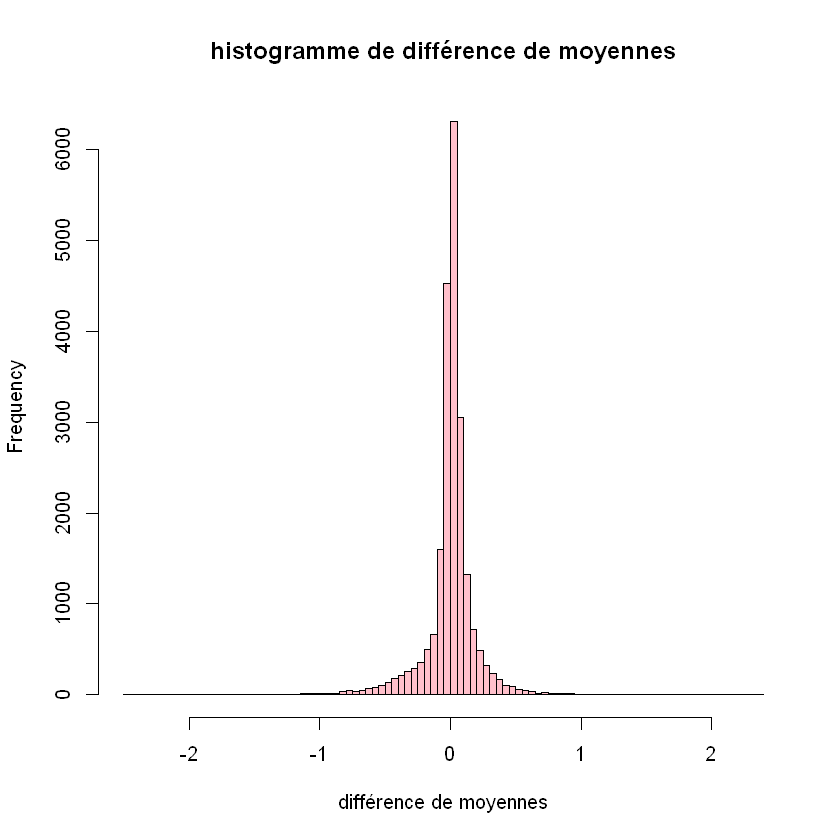

In [20]:
hist(genes.parameters$d, breaks=90, col='pink', main="histogramme de différence de moyennes", xlab="différence de moyennes")

6. Sélectionnez un gène au hasard, récupérez dans un vecteur la ligne correspondante dans la table d’expression, et effectuez un test de comparaison de moyennes entre les deux groupes pour ce gène. On extraira des informations obtenues la taille d’effet et la p value.


In [21]:
gene <- sample(x = row.names(expr.matrix), size= 1)

test.result <- t.test(group.one.expr[gene, ], group.two.expr[gene, ], alternative = "two.sided")

test.t.result <- c(test.result$statistic, test.result$p.value, test.result$parameter, test.result$estimate)
names(test.t.result) <- c("t", "p", "df", "m1", "m2")
test.t.result["d"]  <- test.t.result["m2"] - test.t.result["m1"] 

test.t.result

t           p          df          m1          m2           d 
-1.06716380  0.28897539 83.45200429  1.92204545  1.95090909  0.02886364

7. vérification pour le test t 

### Phase 3

1. Ecrivez une fonction R dénommée t.test.wrapper qui prend en entrée 2 vecteurs (expression et classes de cancer, respectivement), effectue un test de Student, et retourne un vecteur avec les statistiques pertinentes, c’est-à-dire "t", "p", "df", "m1", "m2","d".


In [22]:
t.test.wrapper <- function(expression, class) {
    group.one.values <- expression[class == class[1]]
    group.two.values <- expression[class != class[1]]
    t.result <- t.test(group.one.values, group.two.values, alternative = "two.sided")
    
    result <- c(t.result$statistic, t.result$p.value, t.result$parameter, t.result$estimate)
    names(result) <- c("t", "p", "df", "m1", "m2")
    result['d'] <- result["m2"] - result["m1"]
    result['s1.est'] <- sd(group.one.values)
    result['s2.est'] <- sd(group.two.values)
    
    return(result)
}

selected.samples <- (sample.labels == group.one) | (sample.labels == group.two)

test.wrapper.result <- t.test.wrapper(expr.matrix[gene, selected.samples], sample.labels[selected.samples])

test.wrapper.result

t           p          df          m1          m2           d 
-1.06716380  0.28897539 83.45200429  1.92204545  1.95090909  0.02886364 
     s1.est      s2.est 
 0.11524654  0.13749957

2. Ecrivez une boucle for qui applique ce même test à chaque ligne de la table d’expression, et récupère dans un tableau les résultats du test, avec une ligne par gène, une colonne par statistique pertinente produite par t.test().

In [23]:
t.test.table <- data.frame(matrix(nrow = nrow(expr.matrix), ncol=length(test.wrapper.result)))
names(t.test.table) <- names(test.wrapper.result)
row.names(t.test.table) <- row.names(expr.matrix)
for (gene in rownames(group.one.expr)) {
    t.test.table[gene, ]  <- t.test.wrapper(expr.matrix[gene, selected.samples], sample.labels[selected.samples])
}

t.test.table

,t,p,df,m1,m2,d,s1.est,s2.est
DDR1|1007_s_at,-0.20442254,8.386294e-01,68.50664,4.679091,4.697045,0.017954545,0.28974582,0.50544284
RFC2|1053_at,-0.21711821,8.286358e-01,85.12354,3.132955,3.142727,0.009772727,0.20012298,0.22157327
HSPA6|117_at,-1.80287252,7.582835e-02,68.16601,2.563864,2.662955,0.099090909,0.18018357,0.31694457
PAX8|121_at,-0.53598738,5.933759e-01,84.46846,6.160682,6.179318,0.018636364,0.15170960,0.17371987
GUCA1A|1255_g_at,-1.20198482,2.327599e-01,83.68006,2.165000,2.188636,0.023636364,0.08420628,0.09961766
UBA7|1294_at,-6.05255097,4.839842e-08,77.01918,5.365682,5.854545,0.488863636,0.30743044,0.43878508
THRA|1316_at,0.30887920,7.581607e-01,85.96702,3.199091,3.190909,-0.008181818,0.12302048,0.12545393
PTPN21|1320_at,0.31743138,7.516858e-01,85.99431,2.313636,2.305682,-0.007954545,0.11705874,0.11801454
CCL5|1405_i_at,-0.91128090,3.648192e-01,81.98098,2.374773,2.446591,0.071818182,0.32617222,0.40853079
CYP2E1|1431_at,-1.43900996,1.538262e-01,84.85622,2.162045,2.197727,0.035681818,0.10934434,0.12287001


### Phase 4
1. Dessinez un volcano plot avec les résultats. Le volcano plot indique en abscisse la "taille d'effet" (dans notre cas, la différence de moyennes), et l'ordonnée $-log_{10} (p)$ ou p est la p-value.
Placer sur ce graphique une droite indiquant un risque alpha=0.05. Que peut-on lire sur ce graphe ?


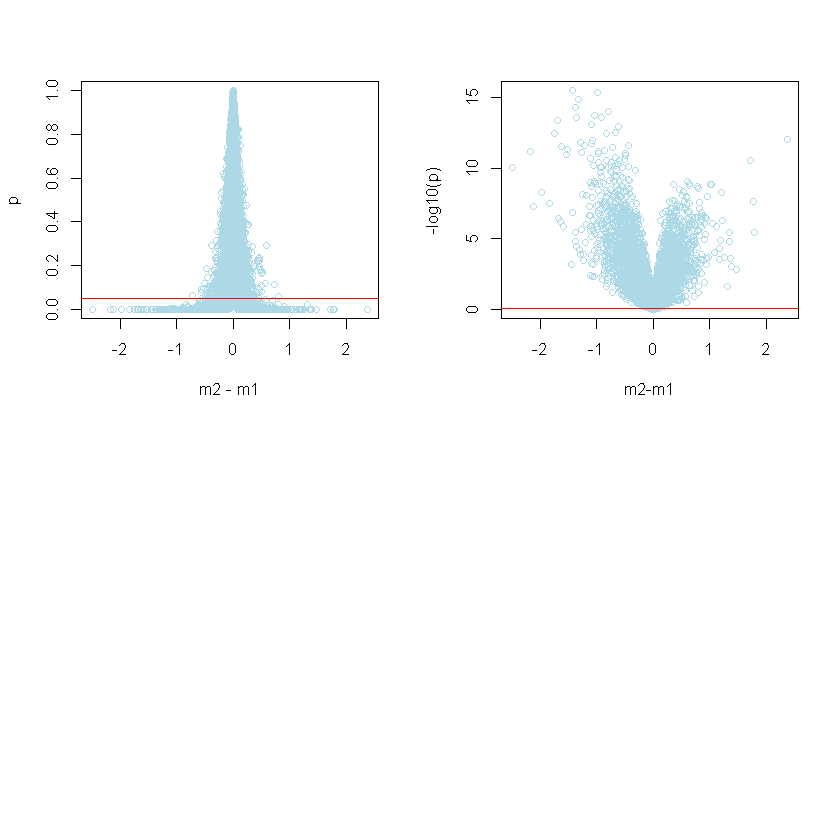

In [32]:
par(mfrow=c(2,2))
plot(t.test.table$d, t.test.table$p, ylab="p", xlab="m2 - m1", col="lightblue")
abline(h=0.05, col="red")
plot(t.test.table$d, -log10(t.test.table$p), ylab="-log10(p)", xlab="m2-m1", col="lightblue")
abline(h=0.05, col="red")

Dans ce graph on peut lire les valeurs de p de chaque différence de moyenne 

2. Dessinez un histogramme des p-values.

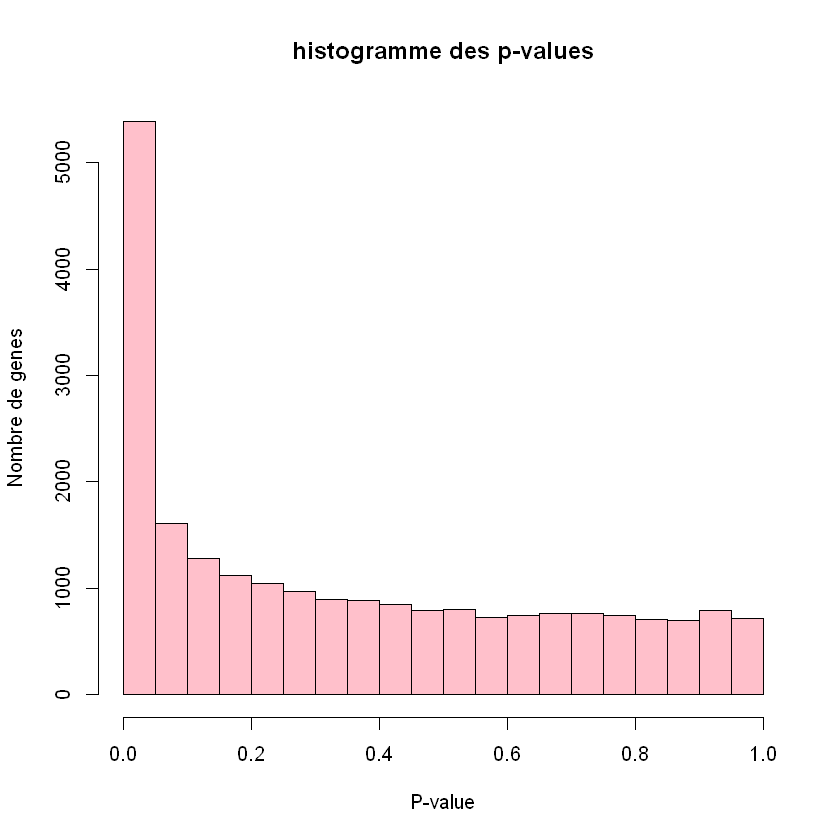

In [33]:
hist(t.test.table$p, main="histogramme des p-values", xlab="P-value", ylab="Nombre de genes", col="pink")

3. Dessinez un histogramme (en densité) avec les valeurs de la statistique du test (Tt).

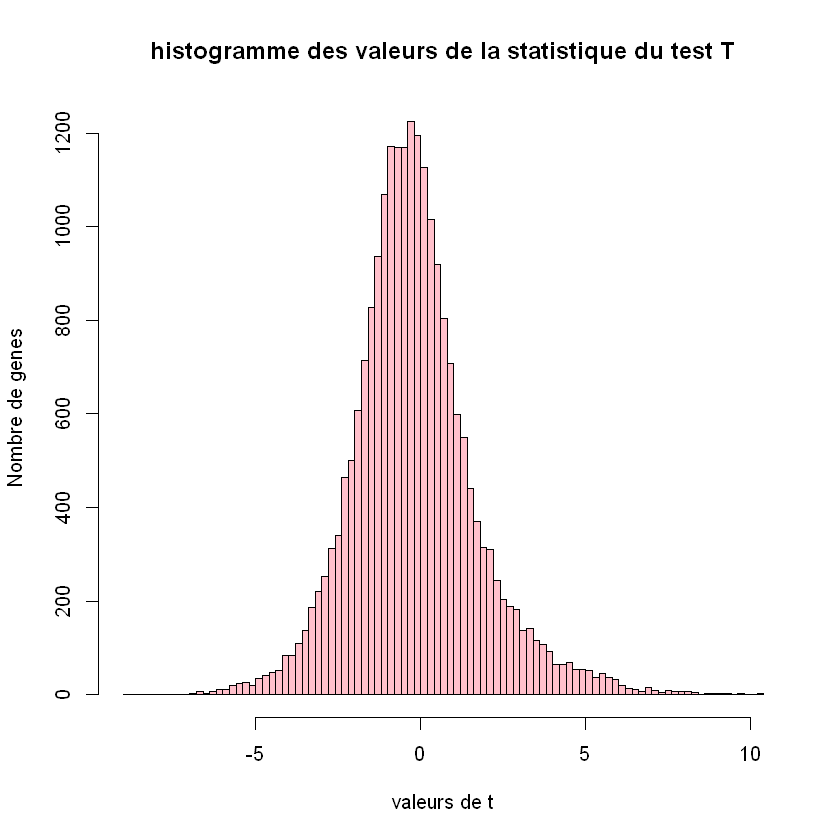

In [36]:
hist(t.test.table$t, breaks=100, main="histogramme des valeurs de la statistique du test T", xlab="valeurs de t", ylab="Nombre de genes", col="pink")

### Phase 5 Simulations 

1. Générez une matrice de données aléatoires de la même taille que la matrice d'expression, où chaque ligne comporte des données normales sous hypothèse nulle ($H0: µ1 = µ2 ). Effectuez le test de Student et dessinez le volcano plot et l'histogramme des p-valeurs. A titre d'exemple, choisissons µ1 = µ2= 0, sigma.1=sigma.2=1. 

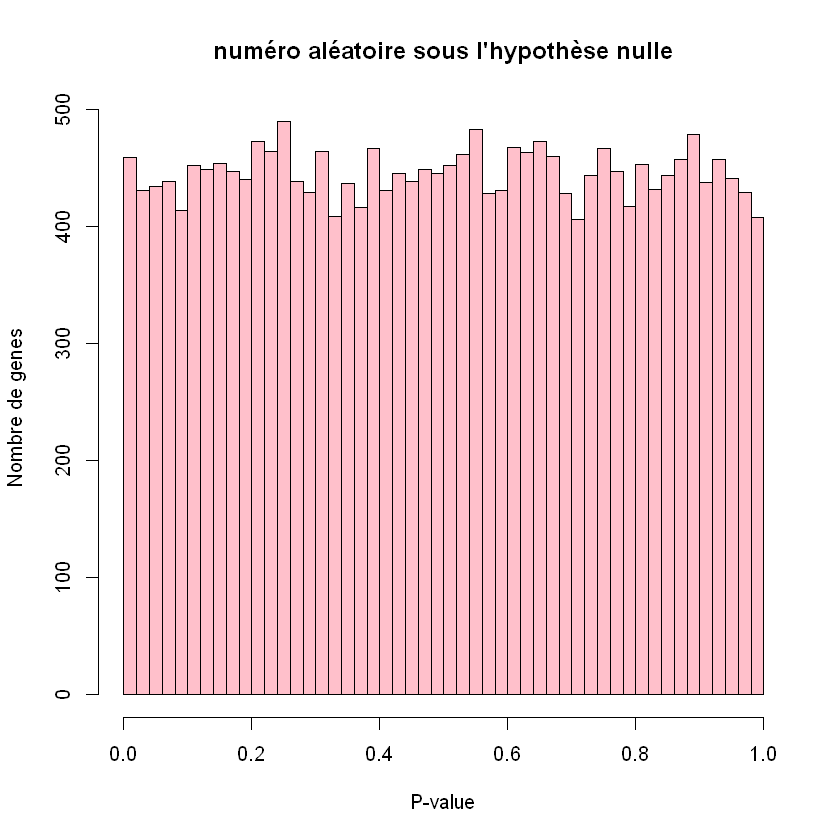

In [45]:
gene.number <- nrow(expr.matrix) 
sample.number <- ncol(expr.matrix) 

# génération de la matrice des données avec des données aléatoires sous l'hypothèse nulle
random.matrix <- matrix(gene.number, sample.number, data = rnorm(n = gene.number * sample.number))

t.test.h0 <- as.data.frame(t(apply(random.matrix[, selected.samples], 1, t.test.wrapper , sample.labels[selected.samples])))
hist(t.test.h0$p, breaks=50, main="numéro aléatoire sous l'hypothèse nulle", xlab="P-value", ylab="Nombre de genes", col="pink")

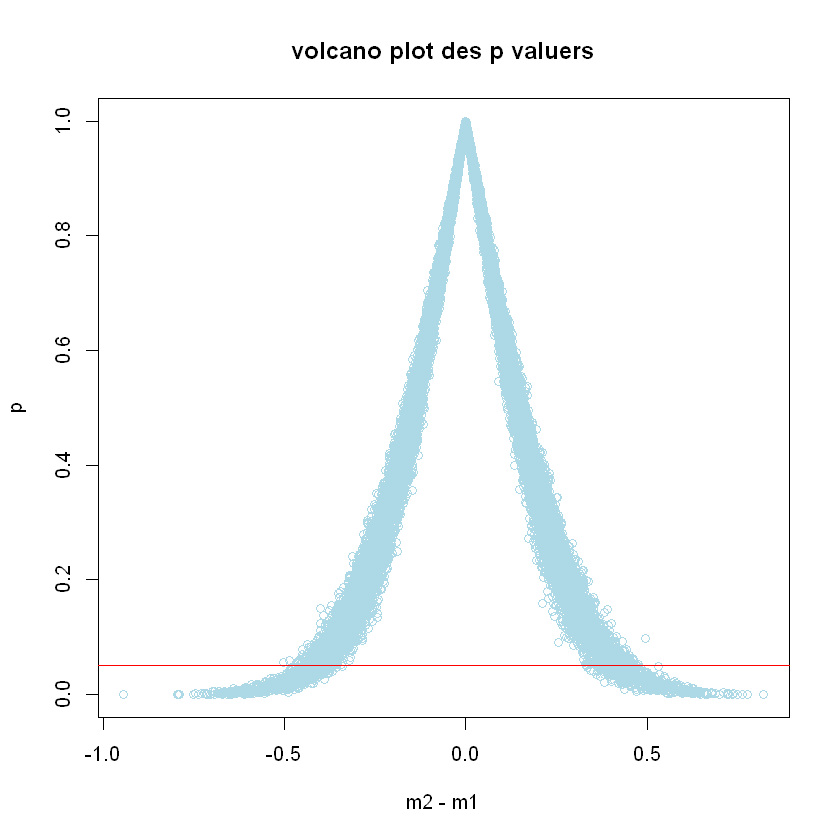

In [46]:
plot(t.test.h0$d, t.test.h0$p, xlab="m2 - m1", ylab="p", col="lightblue", main="volcano plot des p valuers")
abline(h=0.05, col="red")